# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
  product_matrix = np.dot(X_train.T, X_train)

  # Find the eigenvectors
  eigenvalues, eigenvectors = np.linalg.eigh(product_matrix)

  # Sort the eigenvectors
  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_eigenvectors = eigenvectors[:, sorted_indices]

  # Select eigenvectors for dimensionality reduction
  selected_eigenvectors = sorted_eigenvectors[:, :n_components]

  X_train_reduced = np.dot(X_train, selected_eigenvectors)
  X_test_reduced = np.dot(X_test, selected_eigenvectors)

  return X_train_reduced, X_test_reduced, sorted_eigenvectors[:, :5]

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [1, 4, 9, 25, 64, 100, 225, 400, 625, 784]  # You need to decide what number to search...

# Store the results
results = []
top_singular_vectors = None

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, singular_vectors = apply_svd_custom(X_train, X_test, n_components)

    # Top 5 singular vectors
    if n_components == 784:
        top_singular_vectors = singular_vectors

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 1 components...
SVD components: 1, Accuracy: 0.1988, Training time: 0.7987 seconds
Applying custom SVD with 4 components...
SVD components: 4, Accuracy: 0.5299, Training time: 0.8073 seconds
Applying custom SVD with 9 components...
SVD components: 9, Accuracy: 0.7882, Training time: 1.1714 seconds
Applying custom SVD with 25 components...
SVD components: 25, Accuracy: 0.8854, Training time: 4.2816 seconds
Applying custom SVD with 64 components...
SVD components: 64, Accuracy: 0.9137, Training time: 21.1846 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 60.3065 seconds
Applying custom SVD with 225 components...
SVD components: 225, Accuracy: 0.9201, Training time: 168.5910 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9195, Training time: 437.2617 seconds
Applying custom SVD with 625 components...
SVD compo

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


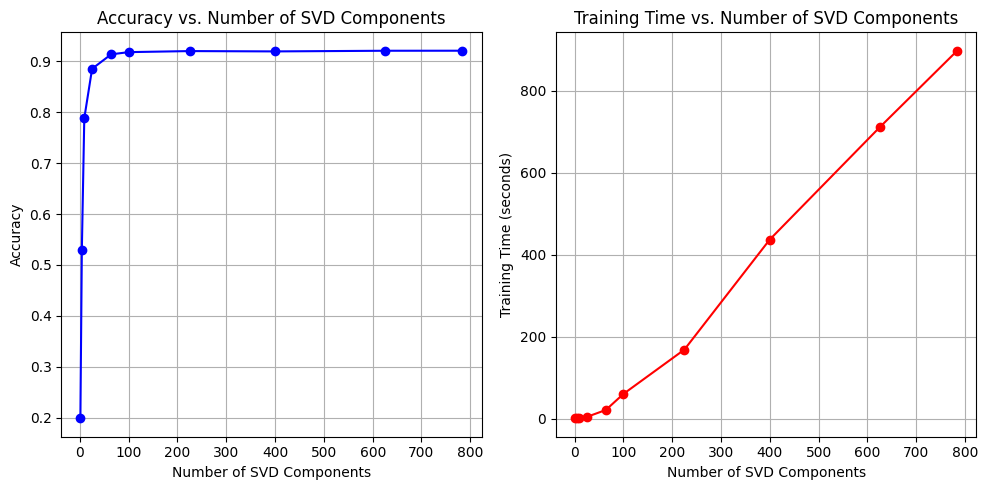

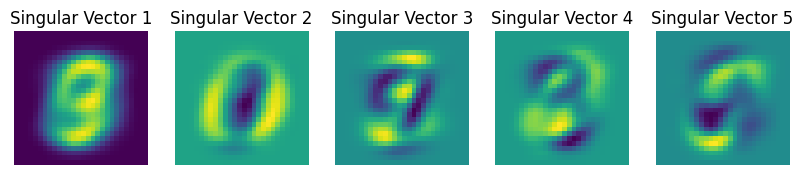

In [ ]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Extracting results for plotting
components = [r['n_components'] for r in results]
accuracies = [r['accuracy'] for r in results]
training_times = [r['training_time'] for r in results]

# Plot Accuracy vs SVD Components
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', color='b')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs SVD Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='r')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting top 5 singular vectors (reshaped as 28x28 images)
if top_singular_vectors is not None:
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(top_singular_vectors[:, i].reshape(28, 28))
        plt.title(f"Singular Vector {i+1}")
        plt.axis('off')
    plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER: The model's accuracy increases significantly as we increase the number of SVD components from 1 to around 25. After that, there is a small but still relatively noticeable increase up until we reach 64 components. After that point the accuracy of the model barely changes at all. However, as the number of components increases, the training time goes up significantly together with the number of componenets. Implementing more and more features shows diminishing returns quite quickly, but requires a lot of time and resources to compute, which often might not be the most effective way to approach the problem. The marginal difference in the accuracy metric implies that we might want to choose the number of components that still produces great results and does not take too much time doing so. In our example, stopping at 64 components might be a good idea as this is the point where accuracy stops increasing in meaningful ways but time needs become too large for the kind of benefit we are getting in return. So, 64 looks best as **n_components**.